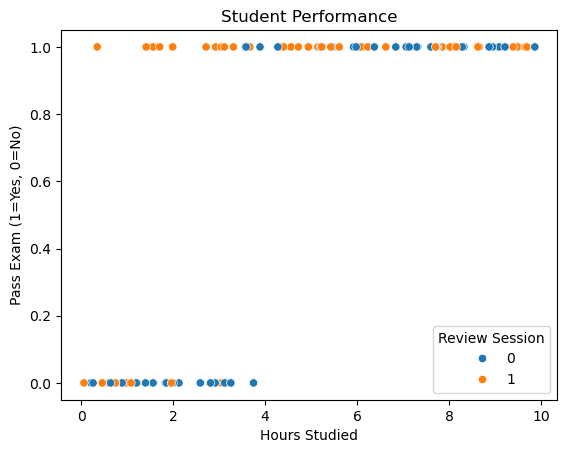

Intercept: -4.6137389159566276
Coefficients: [[1.36542016 1.87797591]]
Accuracy: 0.93
AUC Score: 0.9761029411764706


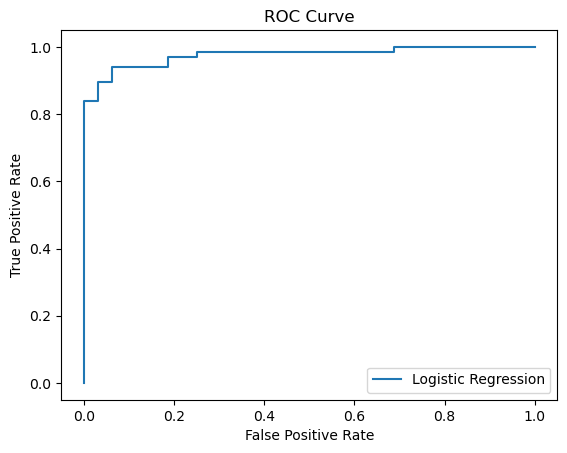

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Load dataset
data = pd.read_csv('/Users/avinashtelagamsetti/Desktop/Classwork03102025/student_data.csv')

# Visualize the data
sns.scatterplot(x='Hours_Studied', y='Results', hue='Review_Session', data=data)
plt.xlabel('Hours Studied')
plt.ylabel('Pass Exam (1=Yes, 0=No)')
plt.title('Student Performance')
plt.legend(title='Review Session')
plt.show()

# Define features and target variable
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Train logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Output model coefficients
print("Intercept:", model.intercept_[0])
print("Coefficients:", model.coef_)

# Predictions
y_pred = model.predict(X)
y_prob = model.predict_proba(X)[:, 1]

# Model performance metrics
accuracy = accuracy_score(y, y_pred)
auc = roc_auc_score(y, y_prob)
print("Accuracy:", accuracy)
print("AUC Score:", auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y, y_prob)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

/var/folders/w4/2tmsp1c97wngxr7vxd50mv3m0000gn/T/ipykernel_34013/944494751.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Pass Exam (1=Yes, 0=No)')


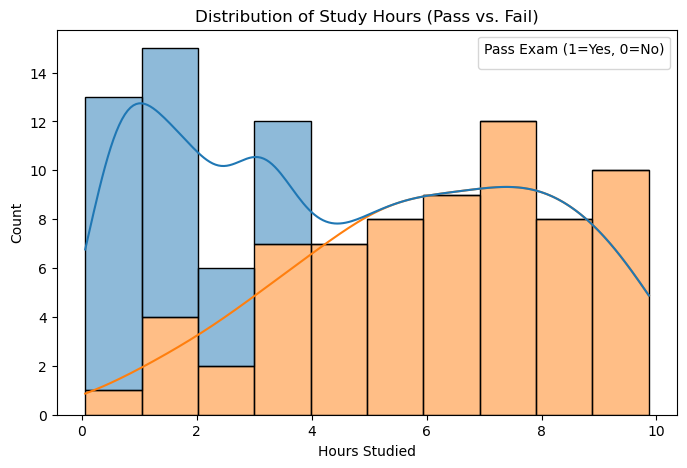

/var/folders/w4/2tmsp1c97wngxr7vxd50mv3m0000gn/T/ipykernel_34013/944494751.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Review_Session', y='Hours_Studied', data=data, palette="coolwarm")


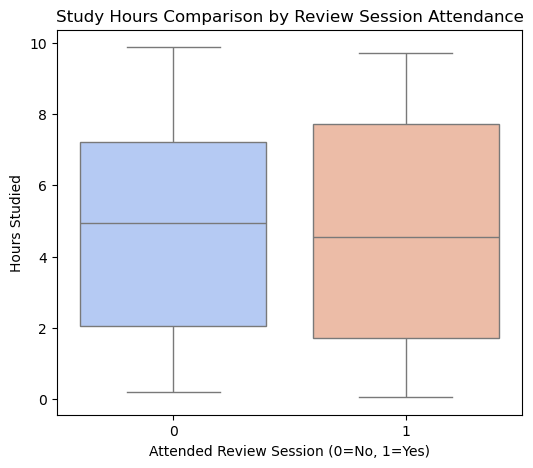

Intercept: -4.6137389159566276
Coefficients: [[1.36542016 1.87797591]]
Accuracy: 0.93
AUC Score: 0.9761029411764706


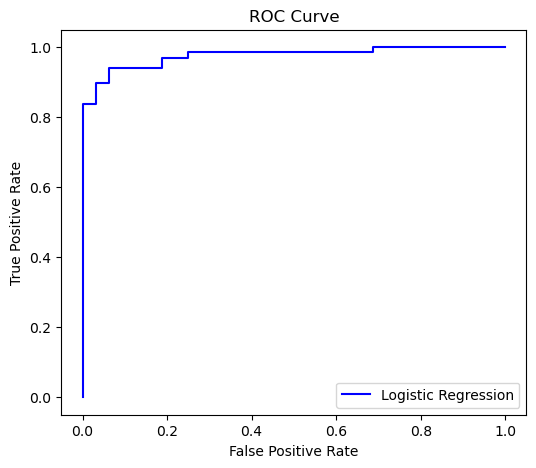

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Load dataset
data = pd.read_csv('/Users/avinashtelagamsetti/Desktop/Classwork03102025/student_data.csv')

# Improved Visualization 1: Histogram of Hours Studied vs. Results
plt.figure(figsize=(8, 5))
sns.histplot(data, x='Hours_Studied', hue='Results', bins=10, kde=True, multiple='stack')
plt.xlabel('Hours Studied')
plt.ylabel('Count')
plt.title('Distribution of Study Hours (Pass vs. Fail)')
plt.legend(title='Pass Exam (1=Yes, 0=No)')
plt.show()

# Improved Visualization 2: Boxplot for Review Session Attendance
plt.figure(figsize=(6, 5))
sns.boxplot(x='Review_Session', y='Hours_Studied', data=data, palette="coolwarm")
plt.xlabel('Attended Review Session (0=No, 1=Yes)')
plt.ylabel('Hours Studied')
plt.title('Study Hours Comparison by Review Session Attendance')
plt.show()

# Define features and target variable
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Train logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Output model coefficients
print("Intercept:", model.intercept_[0])
print("Coefficients:", model.coef_)

# Predictions
y_pred = model.predict(X)
y_prob = model.predict_proba(X)[:, 1]

# Model performance metrics
accuracy = accuracy_score(y, y_pred)
auc = roc_auc_score(y, y_prob)
print("Accuracy:", accuracy)
print("AUC Score:", auc)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
fpr, tpr, _ = roc_curve(y, y_prob)
plt.plot(fpr, tpr, label='Logistic Regression', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


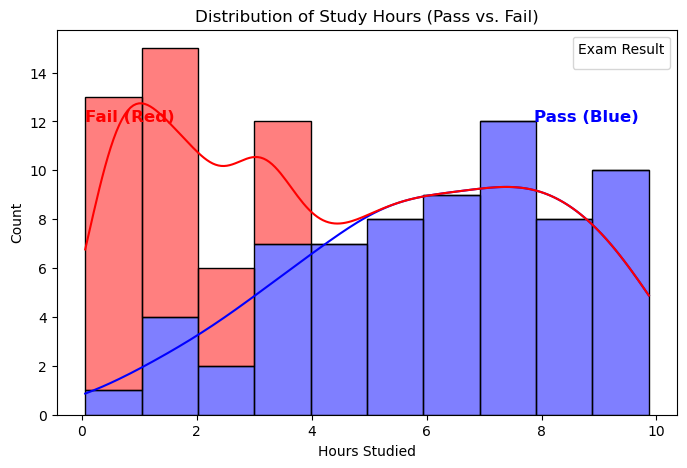

/var/folders/w4/2tmsp1c97wngxr7vxd50mv3m0000gn/T/ipykernel_34013/4005345531.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Review_Session', y='Hours_Studied', data=data, palette="coolwarm")


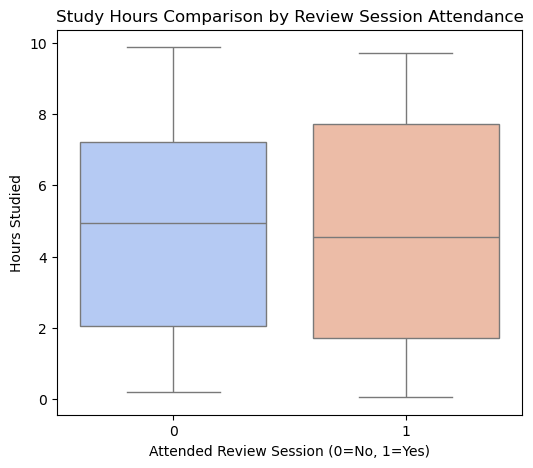

Intercept: -4.6137389159566276
Coefficients: [[1.36542016 1.87797591]]
Accuracy: 0.93
AUC Score: 0.9761029411764706


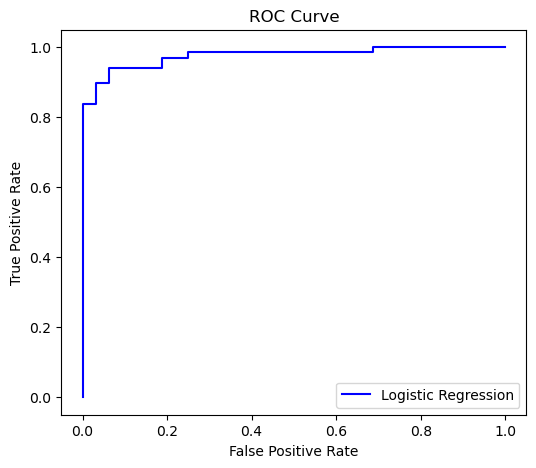

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Load dataset
data = pd.read_csv('/Users/avinashtelagamsetti/Desktop/Classwork03102025/student_data.csv')

# Improved Visualization 1: Histogram of Study Hours (Pass vs. Fail)
plt.figure(figsize=(8, 5))
ax = sns.histplot(data, x='Hours_Studied', hue='Results', bins=10, kde=True, multiple='stack', 
                  palette={0: 'red', 1: 'blue'})

plt.xlabel('Hours Studied')
plt.ylabel('Count')
plt.title('Distribution of Study Hours (Pass vs. Fail)')

# Custom Legend
handles, labels = ax.get_legend_handles_labels()
new_labels = ['Fail (0) - Red', 'Pass (1) - Blue']
plt.legend(handles, new_labels, title='Exam Result', loc='upper right')

# Add text annotations to indicate pass/fail regions
plt.text(x=data['Hours_Studied'].min(), y=max(ax.patches, key=lambda p: p.get_height()).get_height(), 
         s="Fail (Red)", color='red', fontsize=12, fontweight='bold')
plt.text(x=data['Hours_Studied'].max() - 2, y=max(ax.patches, key=lambda p: p.get_height()).get_height(), 
         s="Pass (Blue)", color='blue', fontsize=12, fontweight='bold')

plt.show()

# Improved Visualization 2: Boxplot for Review Session Attendance
plt.figure(figsize=(6, 5))
sns.boxplot(x='Review_Session', y='Hours_Studied', data=data, palette="coolwarm")
plt.xlabel('Attended Review Session (0=No, 1=Yes)')
plt.ylabel('Hours Studied')
plt.title('Study Hours Comparison by Review Session Attendance')
plt.show()

# Define features and target variable
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Train logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Output model coefficients
print("Intercept:", model.intercept_[0])
print("Coefficients:", model.coef_)

# Predictions
y_pred = model.predict(X)
y_prob = model.predict_proba(X)[:, 1]

# Model performance metrics
accuracy = accuracy_score(y, y_pred)
auc = roc_auc_score(y, y_prob)
print("Accuracy:", accuracy)
print("AUC Score:", auc)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
fpr, tpr, _ = roc_curve(y, y_prob)
plt.plot(fpr, tpr, label='Logistic Regression', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


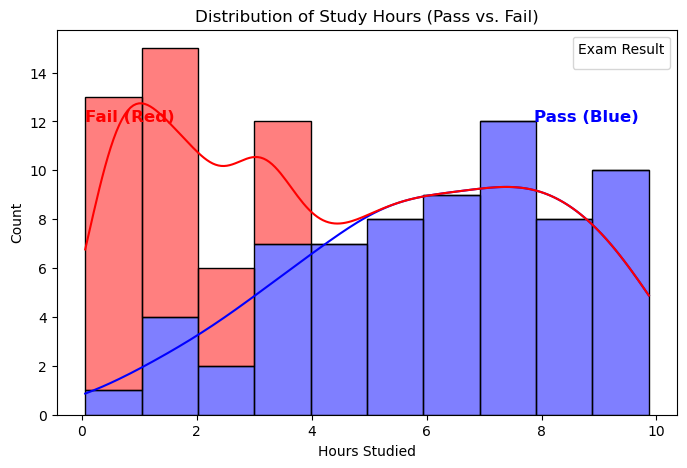

/var/folders/w4/2tmsp1c97wngxr7vxd50mv3m0000gn/T/ipykernel_34013/4005345531.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Review_Session', y='Hours_Studied', data=data, palette="coolwarm")


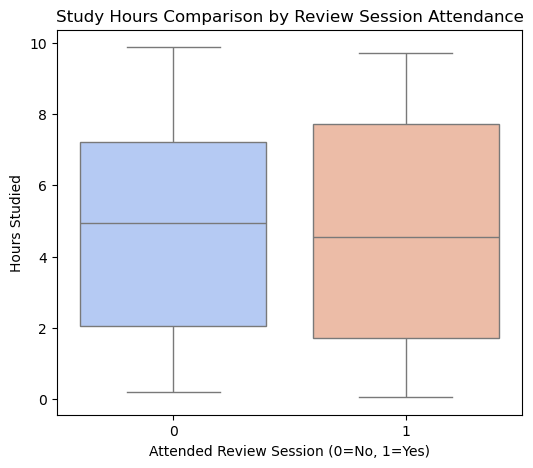

Intercept: -4.6137389159566276
Coefficients: [[1.36542016 1.87797591]]
Accuracy: 0.93
AUC Score: 0.9761029411764706


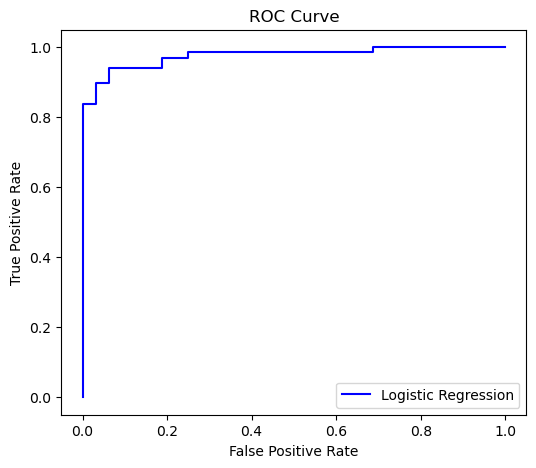

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Load dataset
data = pd.read_csv('/Users/avinashtelagamsetti/Desktop/Classwork03102025/student_data.csv')

# Improved Visualization 1: Histogram of Study Hours (Pass vs. Fail)
plt.figure(figsize=(8, 5))
ax = sns.histplot(data, x='Hours_Studied', hue='Results', bins=10, kde=True, multiple='stack', 
                  palette={0: 'red', 1: 'blue'})

plt.xlabel('Hours Studied')
plt.ylabel('Count')
plt.title('Distribution of Study Hours (Pass vs. Fail)')

# Custom Legend
handles, labels = ax.get_legend_handles_labels()
new_labels = ['Fail (0) - Red', 'Pass (1) - Blue']
plt.legend(handles, new_labels, title='Exam Result', loc='upper right')

# Add text annotations to indicate pass/fail regions
plt.text(x=data['Hours_Studied'].min(), y=max(ax.patches, key=lambda p: p.get_height()).get_height(), 
         s="Fail (Red)", color='red', fontsize=12, fontweight='bold')
plt.text(x=data['Hours_Studied'].max() - 2, y=max(ax.patches, key=lambda p: p.get_height()).get_height(), 
         s="Pass (Blue)", color='blue', fontsize=12, fontweight='bold')

plt.show()

# Improved Visualization 2: Boxplot for Review Session Attendance
plt.figure(figsize=(6, 5))
sns.boxplot(x='Review_Session', y='Hours_Studied', data=data, palette="coolwarm")
plt.xlabel('Attended Review Session (0=No, 1=Yes)')
plt.ylabel('Hours Studied')
plt.title('Study Hours Comparison by Review Session Attendance')
plt.show()

# Define features and target variable
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Train logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Output model coefficients
print("Intercept:", model.intercept_[0])
print("Coefficients:", model.coef_)

# Predictions
y_pred = model.predict(X)
y_prob = model.predict_proba(X)[:, 1]

# Model performance metrics
accuracy = accuracy_score(y, y_pred)
auc = roc_auc_score(y, y_prob)
print("Accuracy:", accuracy)
print("AUC Score:", auc)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
fpr, tpr, _ = roc_curve(y, y_prob)
plt.plot(fpr, tpr, label='Logistic Regression', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


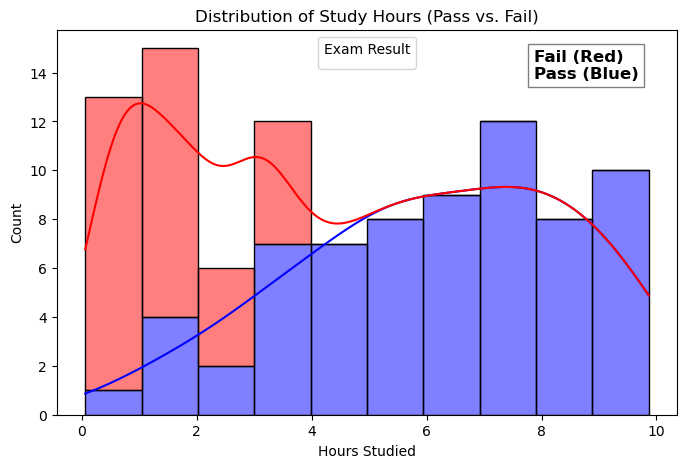

/var/folders/w4/2tmsp1c97wngxr7vxd50mv3m0000gn/T/ipykernel_34013/4234633679.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Review_Session', y='Hours_Studied', data=data, palette="coolwarm")


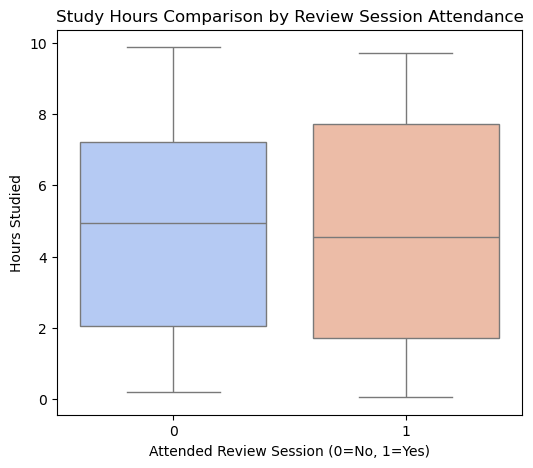

Intercept: -4.6137389159566276
Coefficients: [[1.36542016 1.87797591]]
Accuracy: 0.93
AUC Score: 0.9761029411764706


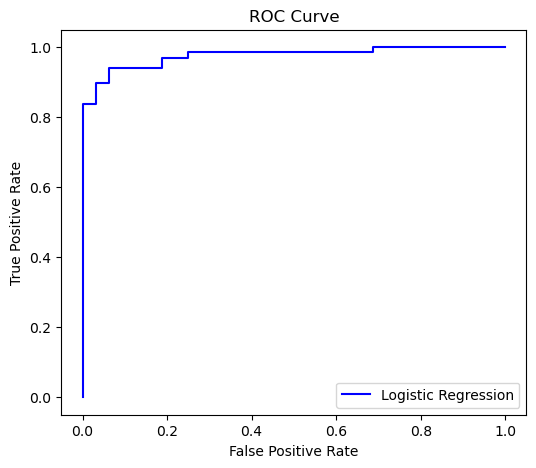

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Load dataset
data = pd.read_csv('/Users/avinashtelagamsetti/Desktop/Classwork03102025/student_data.csv')

# Improved Visualization 1: Histogram of Study Hours (Pass vs. Fail)
plt.figure(figsize=(8, 5))
ax = sns.histplot(data, x='Hours_Studied', hue='Results', bins=10, kde=True, multiple='stack', 
                  palette={0: 'red', 1: 'blue'})

plt.xlabel('Hours Studied')
plt.ylabel('Count')
plt.title('Distribution of Study Hours (Pass vs. Fail)')

# Custom Legend
handles, labels = ax.get_legend_handles_labels()
new_labels = ['Fail (0) - Red', 'Pass (1) - Blue']
plt.legend(handles, new_labels, title='Exam Result', loc='upper center')

# Add text annotations in the top-right corner
plt.text(x=data['Hours_Studied'].max() - 2,   # Adjust X position to be near the right side
         y=ax.get_ylim()[1] - 2,  # Adjust Y position to be near the top
         s="Fail (Red)\nPass (Blue)", 
         color='black', fontsize=12, fontweight='bold', bbox=dict(facecolor='white', alpha=0.5))

plt.show()

# Improved Visualization 2: Boxplot for Review Session Attendance
plt.figure(figsize=(6, 5))
sns.boxplot(x='Review_Session', y='Hours_Studied', data=data, palette="coolwarm")
plt.xlabel('Attended Review Session (0=No, 1=Yes)')
plt.ylabel('Hours Studied')
plt.title('Study Hours Comparison by Review Session Attendance')
plt.show()

# Define features and target variable
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Train logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Output model coefficients
print("Intercept:", model.intercept_[0])
print("Coefficients:", model.coef_)

# Predictions
y_pred = model.predict(X)
y_prob = model.predict_proba(X)[:, 1]

# Model performance metrics
accuracy = accuracy_score(y, y_pred)
auc = roc_auc_score(y, y_prob)
print("Accuracy:", accuracy)
print("AUC Score:", auc)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
fpr, tpr, _ = roc_curve(y, y_prob)
plt.plot(fpr, tpr, label='Logistic Regression', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
